In [1]:
import sys
import os
import json

if '..//..//' not in sys.path:
    sys.path.append('..//../')

from opmsim.optical_system_base import OpticalSystem
from opmsim import optical_elements
from opmsim import dipole_source
import numpy as np
from matplotlib import pyplot as plt


## Element setup and save paths

In [6]:
savepath = "C:/Users/lnr19/OneDrive - Imperial College London/thesis/for _thesis/modelling/pupils_2/"
#savepath = "C:/Users/Leo/OneDrive - Imperial College London/thesis/for _thesis/modelling/pupils_2/"


savepath_full = os.path.join(savepath, "OPM_nico_ray_range_test2_only")
if not os.path.exists(savepath_full):
    os.makedirs(savepath_full)
save_filename = os.path.join(savepath_full,'collection_efficiency.txt')
save_details = os.path.join(savepath_full,'sim_details.txt')


# setup
# O1
M_O1 = 60
NA_O1 = 1.2
n_O1 =1.33
f_TL1 = 0.180  # Olympus
f_O1 = f_TL1/M_O1

# high NA O1 (Nikon)
M_O1_h = 60
NA_O1_h = 1.27
n_O1_h = 1.33

f_TL1_h = 0.20  # Nikon
# f_TL1_h = 0.18  # Using original Olympus TL, then use 162mm TL2 if using Thorlabs O2!

f_O1_h = 0.2/M_O1

# long WD (O3 or O2)
M_LWD = 50
NA_LWD = 0.75
f_LWD = 0.2/M_LWD

# O2
M_olympus_50x = 50
NA_olympus_50x = 0.95
f_olympus_50x = 0.180/M_olympus_50x

f_TL2 = 0.162406015
#f_TL2 = 0.216

# f_TL2= 0.162#0.180  # Olympus
f_TL2_flipped = 0.180451128 #0.180# 0.150376
f_TL2_lwd = 0.180
# f_TL2_flipped = 0.180451128

# f_TL2_flipped = 0.162# 0.150376

# O3 (original)
M_O3 = 40
NA_O3 = 0.6
n_O3 = 1
f_TL3 = 0.1013  
f_O3 = 0.2/M_O3 # Nikon

# include extra angles
include_extra_angles = False #True

opm_angles = [0, 35, 45]#,18.2, 23.2]
opm_angles = [0]


In [9]:
dipole_count = 7500

options = {
    'ray_count': 12000,
    'draw_rays': False,
    'max_rays_stored': 1000,
    'ray_dist': 'uniform'
}

# 'ray_dist': 'uniform_phi_inbetween'
# 'ray_dist': 'fibonacci'

plot_options = {
    'title': 'Pupil intensity at final image plane of dOPM microscope',
    'add_sim_details': True,
    'pupil_boundary_radius': 0,
    'scale_range': None,# [0,0.3],
    'add_autoscale_plots': True
}

#opm_angle = 35*np.pi/180
update_history=False


O1 = optical_elements.SineLens(NA=NA_O1, focal_length=f_O1, n=n_O1,update_history=update_history)
O1_a = optical_elements.SineLens(NA=NA_O1/n_O1, focal_length=f_O1, n=1, update_history=update_history)

O1_075 = optical_elements.SineLens(NA=0.75, focal_length=f_O1, n=1, update_history=update_history)

O1_h = optical_elements.SineLens(NA=NA_O1_h, focal_length=f_O1_h, n=n_O1_h, update_history=update_history)
O1_h_a = optical_elements.SineLens(NA=NA_O1_h/n_O1_h, focal_length=f_O1_h, n=1, update_history=update_history)
TL1 = optical_elements.SineLens(NA=0.1, focal_length=f_TL1, n=1,update_history=update_history)
TL1_h = optical_elements.SineLens(NA=0.1, focal_length=f_TL1_h, n=1,update_history=update_history)
olympus_50x_angled = lambda opm_angle: optical_elements.SineLens(NA=NA_olympus_50x, focal_length=f_olympus_50x, n=1, y_axis_rotation=opm_angle*np.pi/180, update_history=update_history)
olympus_50x = optical_elements.SineLens(NA=NA_olympus_50x, focal_length=f_olympus_50x, n=1, update_history=update_history)
TL2 = optical_elements.SineLens(NA=0.1, focal_length=f_TL2, n=1, update_history=update_history)
TL2_flipped = optical_elements.SineLens(NA=0.1, focal_length=f_TL2_flipped, n=1, update_history=update_history)
TL2_lwd = optical_elements.SineLens(NA=0.1, focal_length=f_TL2_lwd, n=1, update_history=update_history)
LWD = optical_elements.SineLens(NA=NA_LWD, focal_length=f_LWD, n=1, update_history=update_history)
LWD_angled = lambda opm_angle: optical_elements.SineLens(NA=NA_LWD, focal_length=f_LWD, n=1, y_axis_rotation=opm_angle*np.pi/180, update_history=update_history)
TL3 = optical_elements.SineLens(NA=0.1, focal_length=f_TL3, n=1, update_history=update_history)
O3 = lambda opm_angle: optical_elements.SineLens(NA=NA_O3, focal_length=f_O3, n=1, y_axis_rotation=opm_angle*np.pi/180, update_history=update_history)

elements_fun = lambda opm_angle: [O1_h, TL1_h, TL2, olympus_50x, LWD_angled(opm_angle)]
elements_fun = lambda opm_angle: [O1, TL1, TL2, olympus_50x, LWD_angled(opm_angle)]
#elements_fun = lambda opm_angle: [O1_a, TL1, TL2, olympus_50x, LWD_angled(opm_angle)]
#elements_fun = lambda opm_angle: [O1_h_a, TL1_h, TL2, olympus_50x, LWD_angled(opm_angle)]


# elements_fun = lambda opm_angle: [O1, TL1, TL2_lwd, LWD]

# elements_fun = lambda opm_angle: [O1_h, TL1_h, TL2_flipped, LWD, olympus_50x_angled(opm_angle)]
elements_test = elements_fun(0)
element_onelens = [O1_075]

# Check magnification is correct
M1 = elements_test[1].focal_length/elements_test[0].focal_length
M2 = elements_test[2].focal_length/elements_test[3].focal_length
Mt = M1/M2

if abs(Mt-elements_test[0].n)>5e-3:
    print("Focal lengths: %f %f %f %f" % (elements_test[0].focal_length, elements_test[1].focal_length, elements_test[2].focal_length, elements_test[3].focal_length))
    raise ValueError("Refocusing system magnification is not correct: %f not %f" % (Mt, elements_test[0].n))

# add extra angles
NA_lim = min(elements_test[0].NA/elements_test[0].n, elements_test[3].NA/elements_test[3].n)
theta_minO1O2 = 180*np.arcsin(NA_lim)/np.pi
min_OPM_angle = 90-theta_minO1O2
theta3 = 180*np.arcsin(elements_test[4].NA/elements_test[4].n) / np.pi
OPM_angle_noclip = (theta_minO1O2-theta3)*((theta_minO1O2-theta3)>0)

if include_extra_angles and (min_OPM_angle not in opm_angles) and (min_OPM_angle not in opm_angles): 
    if min_OPM_angle not in opm_angles: 
        opm_angles.append(min_OPM_angle)
    if OPM_angle_noclip not in opm_angles: 
        opm_angles.append(OPM_angle_noclip)

print("OPM angles:", opm_angles)    
        
s_pol = lambda opm_angle: (0, (90-opm_angle)*np.pi/180)
p_pol = (np.pi/2,0)

plot_options_p = plot_options; plot_options_s = plot_options; plot_options_un = plot_options;
plot_options_p['scale_range'] = [0,3,4]
plot_options_s['scale_range'] = [0,3,4]
plot_options_un['scale_range'] = [0,7,5]

OPM angles: [0]


Full sphere generation
cap method area sum 12.564694874875116
expected area sum 6.283185307179586
cap method area sum 2.048041101776107
expected area sum 2.1272488661465454


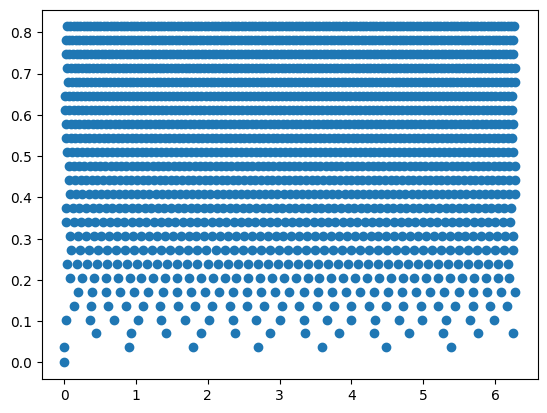

n_dipoles 7499
n_rays 1797
pvec shape (7499, 1, 3)
nvec shape (1, 1797, 3)
(7499, 1797, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
cap method area sum 6.173754296111815
expected area sum 6.283185307179586
n_dipoles 7499
n_rays 5089
pvec shape (7499, 1, 3)
nvec shape (1, 5089, 3)
(7499, 5089, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
n rays 2pi =  5089
(1797, 3, 1)
n rays =  1797
NA area vs real area? 2.048041101776107 2.1272488661465454
half_sphere_energy 4.115839258241223
initial_energy 1.3654103038798135
rays when NA scaled up to hemisphere 5513.016309687344
initialisation time in system 9.739799s
Flat pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x0000023A7743CF70>
CURVED REFRACTION
max rho curved 0.0021817531869197998
Saved checkpoint with 1000 rays


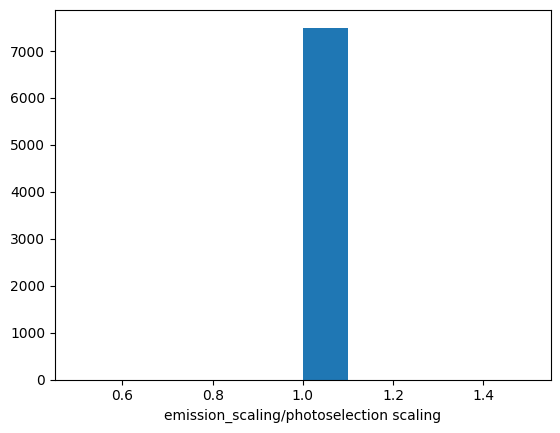

Limiting radius for detector: 0.0022500000000000003
Energy ratio (efficiency): 0.9999999999999997
Total energy per dipole per ray: 1.365410303879813
Energy from Ix 599.0217466690905
Energy from Iy 599.0217466690904
X/Y energy ratio = 1.0000000000000002
Half sphere energy 4.115839258241223
Initial energy 1.3654103038798135
half sphere energy NA 1.3653617498983543
maxr 0.0022500000000000003
0 escaped out of 1797
Saved checkpoint with 1000 rays
0 escaped out of 1797
time in trace_rays 12.693476s
ray count 1797
max Ix 4.856768009732196
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
pupil_boundary_radius 0 max_r 0.0021816105881213416
max_r_reduced 0.0021813989893710766 max_r 0.0021816105881213416


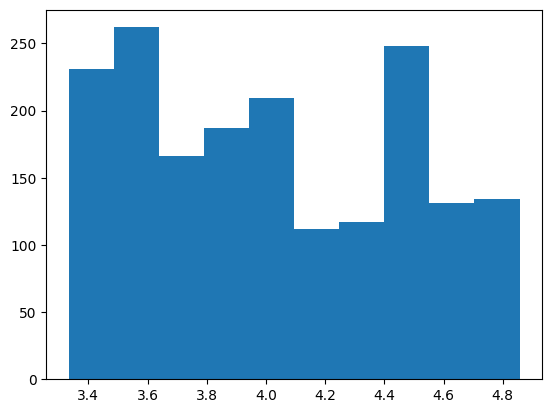

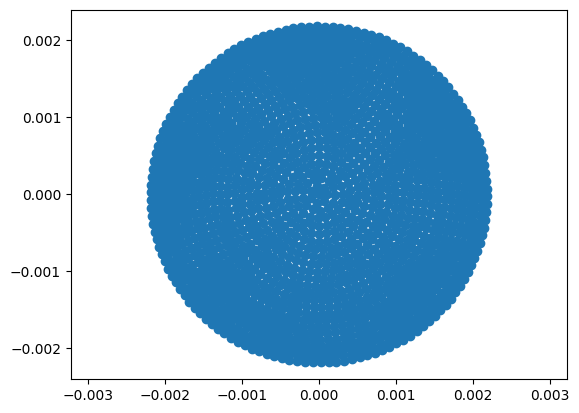

pupil_boundary_radius None max_r 0.0021816105881213416
cb3.vmax bf 9.705


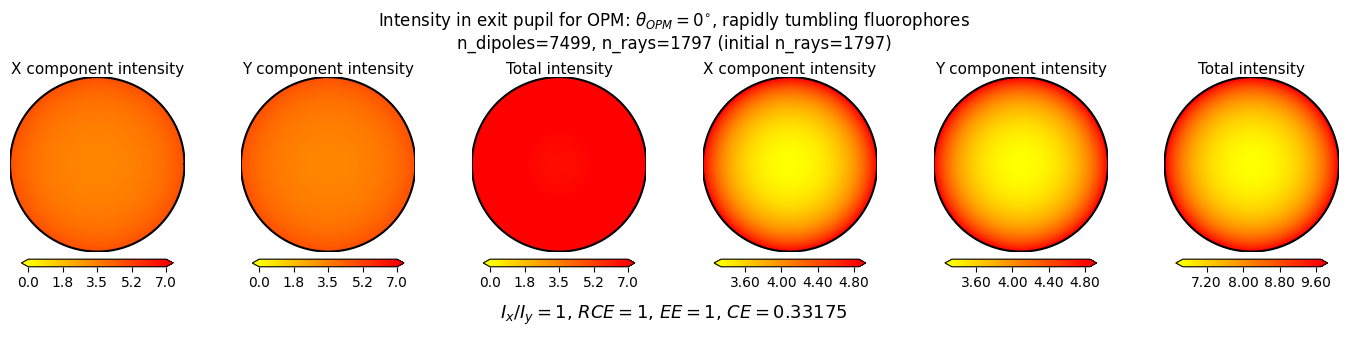

ray count 1797
max Ix 3.333547387795266
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
pupil_boundary_radius 0 max_r 0.7272035293737805
max_r_reduced 0.7271329964570256 max_r 0.7272035293737805


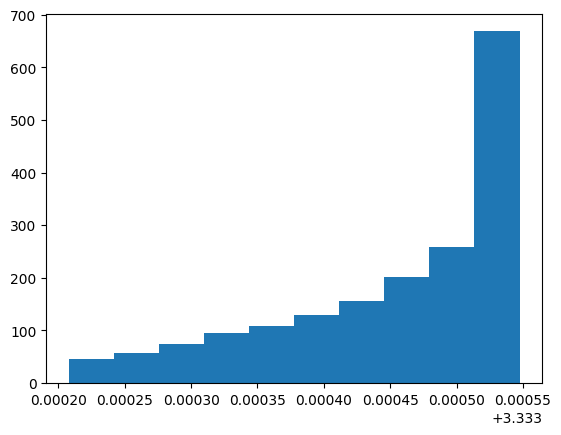

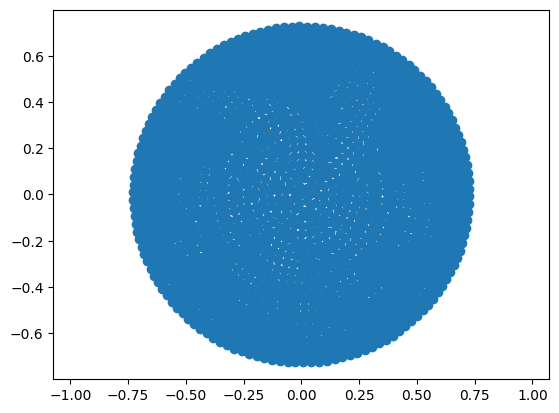

pupil_boundary_radius None max_r 0.7272035293737805
cb3.vmax bf 6.6670945


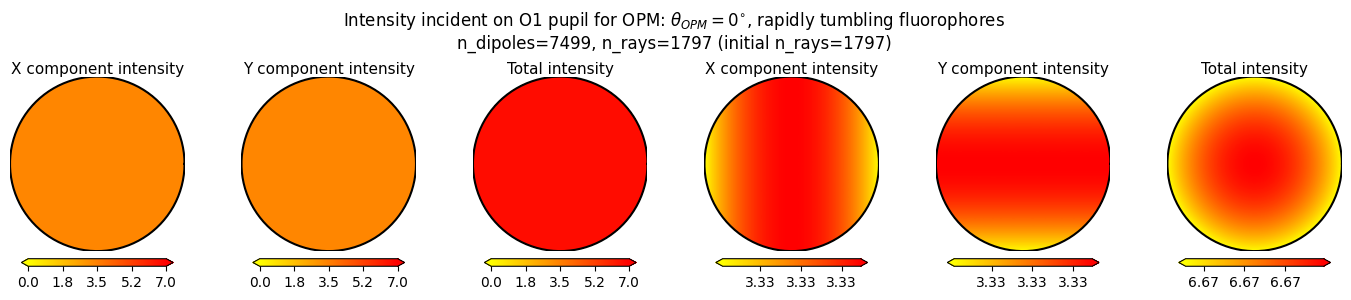

Full sphere generation
cap method area sum 12.564694874875116
expected area sum 6.283185307179586
cap method area sum 2.061217438131186
expected area sum 2.1272488661465454


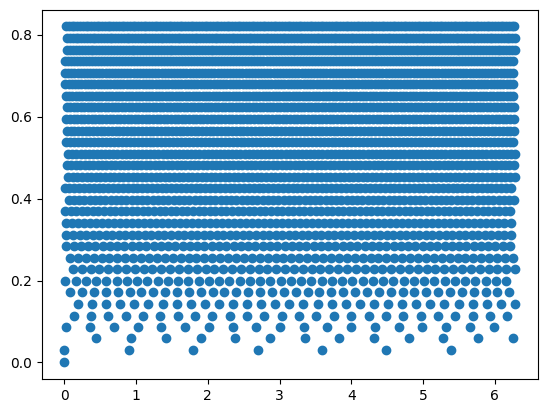

n_dipoles 7499
n_rays 2601
pvec shape (7499, 1, 3)
nvec shape (1, 2601, 3)
(7499, 2601, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
cap method area sum 6.193491053334434
expected area sum 6.283185307179586
n_dipoles 7499
n_rays 7609
pvec shape (7499, 1, 3)
nvec shape (1, 7609, 3)
(7499, 7609, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
n rays 2pi =  7609
(2601, 3, 1)
n rays =  2601
NA area vs real area? 2.061217438131186 2.1272488661465454
half_sphere_energy 4.128996542864457
initial_energy 1.3741945880189799
rays when NA scaled up to hemisphere 7928.598255403456
initialisation time in system 15.157689s
Flat pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x0000023A7743CF70>
CURVED REFRACTION
max rho curved 0.0021931295015362867
Saved checkpoint with 1000 rays


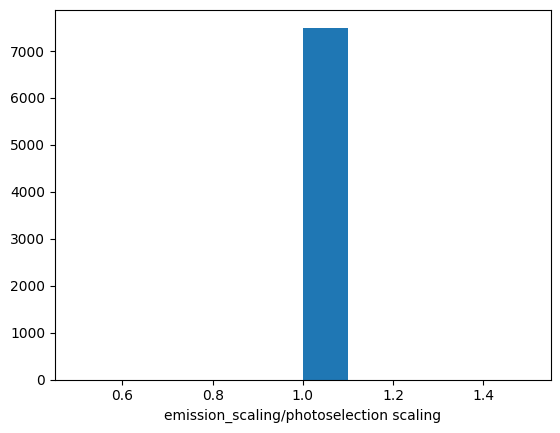

Limiting radius for detector: 0.0022500000000000003
Energy ratio (efficiency): 1.0
Total energy per dipole per ray: 1.3741945880189799
Energy from Ix 867.0313129792864
Energy from Iy 867.0313129792864
X/Y energy ratio = 1.0
Half sphere energy 4.128996542864457
Initial energy 1.3741945880189799
half sphere energy NA 1.3741457931958427
maxr 0.0022500000000000003
0 escaped out of 2601
Saved checkpoint with 1000 rays
0 escaped out of 2601
time in trace_rays 18.276726s
ray count 2601
max Ix 4.885526720278258
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
pupil_boundary_radius 0 max_r 0.002193122728719983
max_r_reduced 0.0021930281324513815 max_r 0.002193122728719983


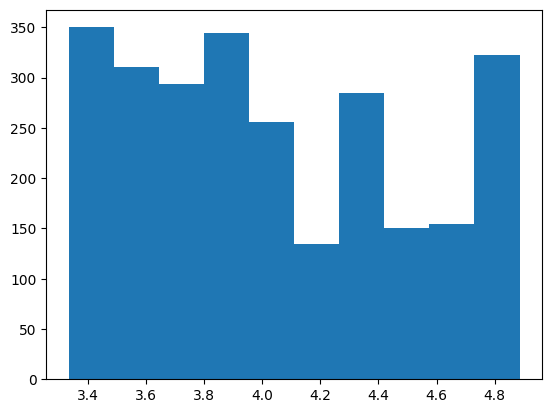

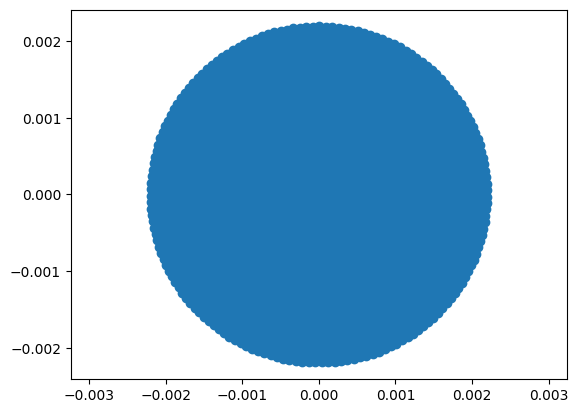

pupil_boundary_radius None max_r 0.002193122728719983
cb3.vmax bf 9.765


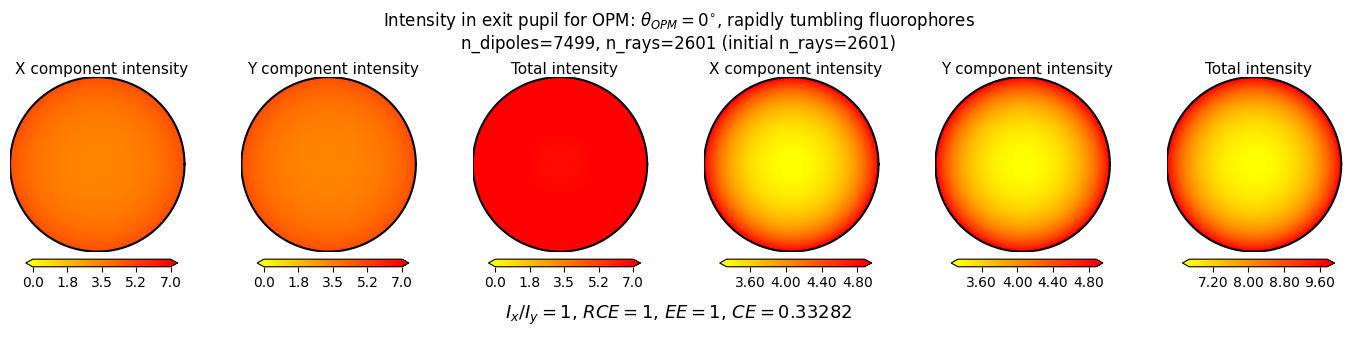

ray count 2601
max Ix 3.333547387795266
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
pupil_boundary_radius 0 max_r 0.7310409095733275
max_r_reduced 0.7310093774837937 max_r 0.7310409095733275


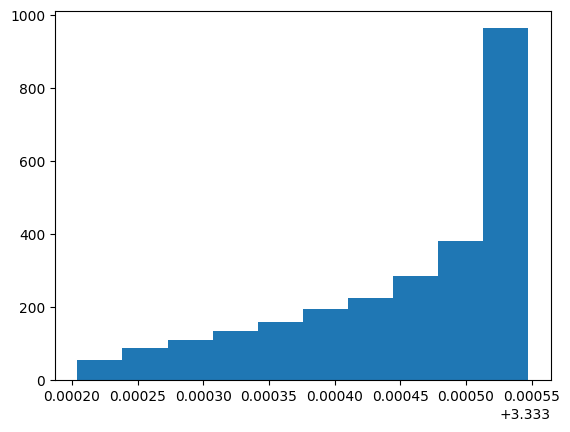

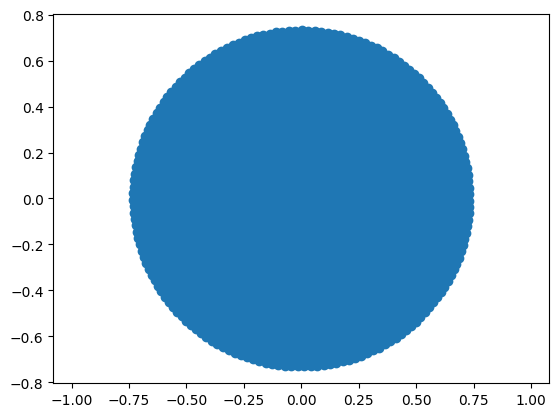

pupil_boundary_radius None max_r 0.7310409095733275
cb3.vmax bf 6.6670945


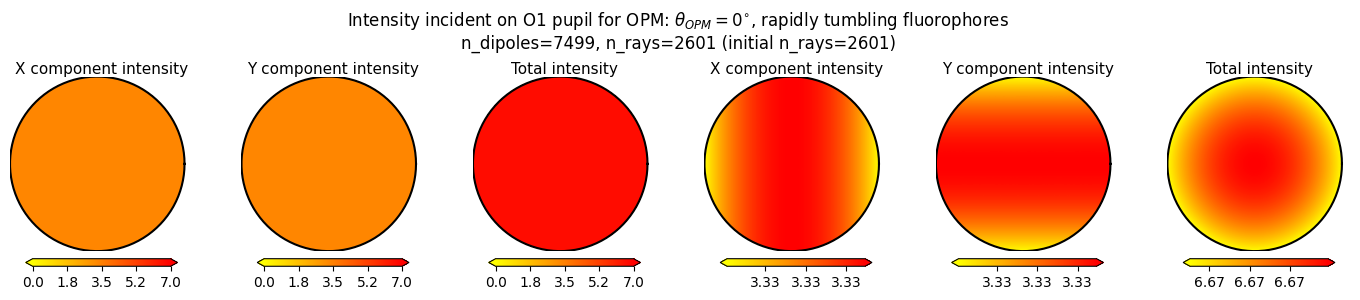

Full sphere generation
cap method area sum 12.564694874875116
expected area sum 6.283185307179586
cap method area sum 2.0707273405195763
expected area sum 2.1272488661465454


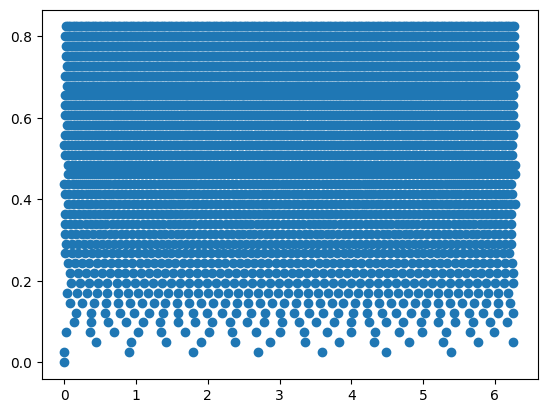

n_dipoles 7499
n_rays 3535
pvec shape (7499, 1, 3)
nvec shape (1, 3535, 3)
(7499, 3535, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
cap method area sum 6.206122919686008
expected area sum 6.283185307179586
n_dipoles 7499
n_rays 10251
pvec shape (7499, 1, 3)
nvec shape (1, 10251, 3)
(7499, 10251, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
n rays 2pi =  10251
(3535, 3, 1)
n rays =  3535
NA area vs real area? 2.0707273405195763 2.1272488661465454
half_sphere_energy 4.137417691747136
initial_energy 1.380534603268131
rays when NA scaled up to hemisphere 10726.211812756937
initialisation time in system 19.240844s
Flat pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x0000023A7743CF70>
CURVED REFRACTION
max rho curved 0.0022013557419305403
Saved checkpoint with 1000 rays


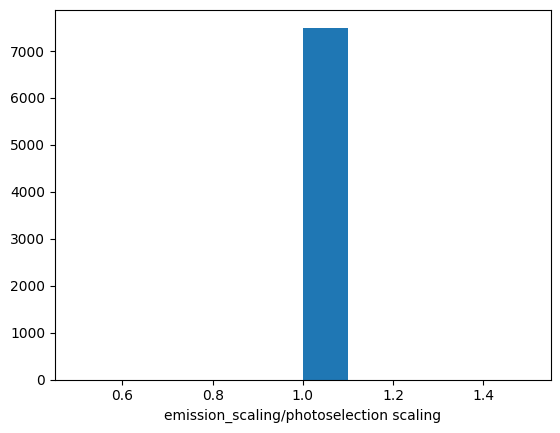

Limiting radius for detector: 0.0022500000000000003
Energy ratio (efficiency): 1.0
Total energy per dipole per ray: 1.380534603268131
Energy from Ix 1178.3757636889873
Energy from Iy 1178.3757636889873
X/Y energy ratio = 1.0
Half sphere energy 4.137417691747136
Initial energy 1.380534603268131
half sphere energy NA 1.380485698450145
maxr 0.0022500000000000003
0 escaped out of 3535
Saved checkpoint with 1000 rays
0 escaped out of 3535
time in trace_rays 25.543592s
ray count 3535
max Ix 4.906738598262814
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
pupil_boundary_radius 0 max_r 0.0022013522567037682
max_r_reduced 0.0022013128813825533 max_r 0.0022013522567037682


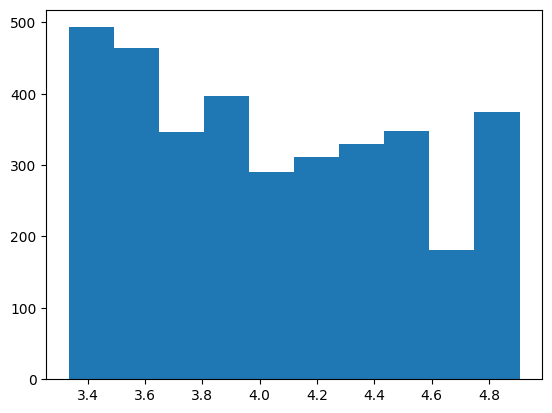

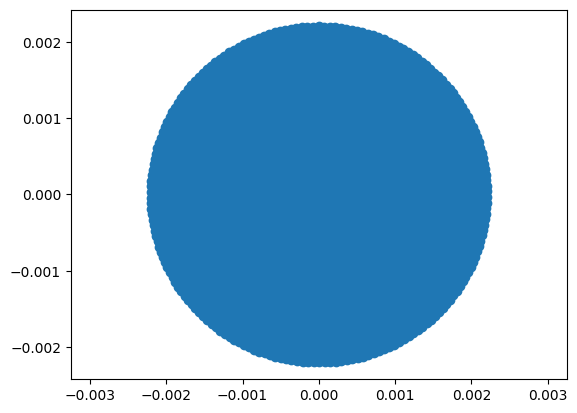

pupil_boundary_radius None max_r 0.0022013522567037682
cb3.vmax bf 9.81


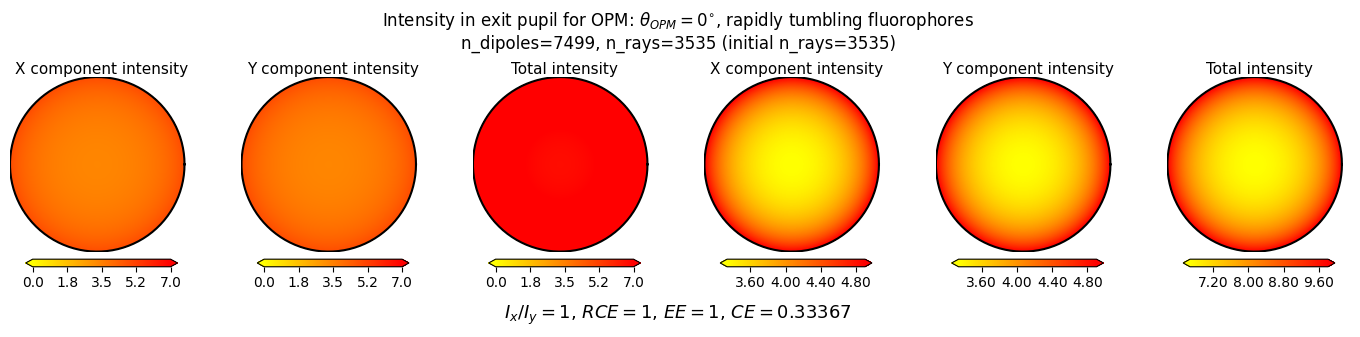

ray count 3535
max Ix 3.333547387795266
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
pupil_boundary_radius 0 max_r 0.7337840855679227
max_r_reduced 0.7337709604608511 max_r 0.7337840855679227


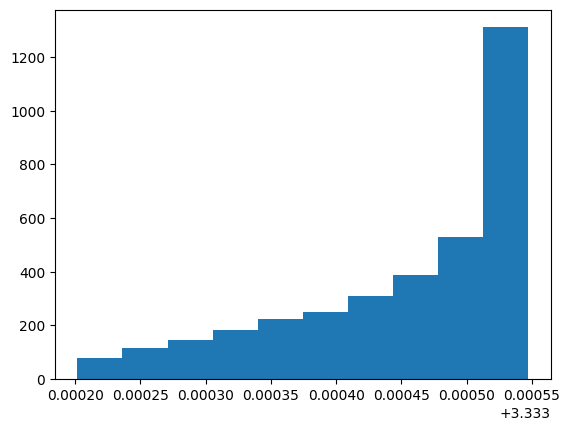

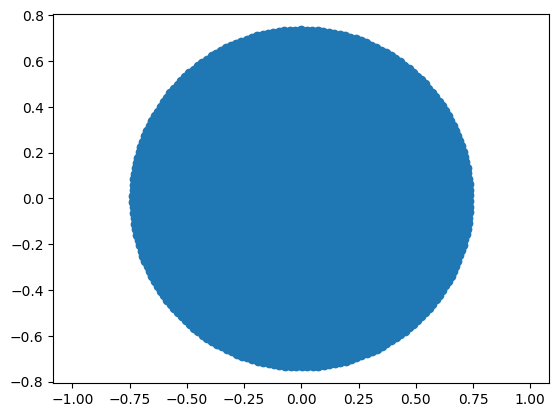

pupil_boundary_radius None max_r 0.7337840855679227
cb3.vmax bf 6.6670945


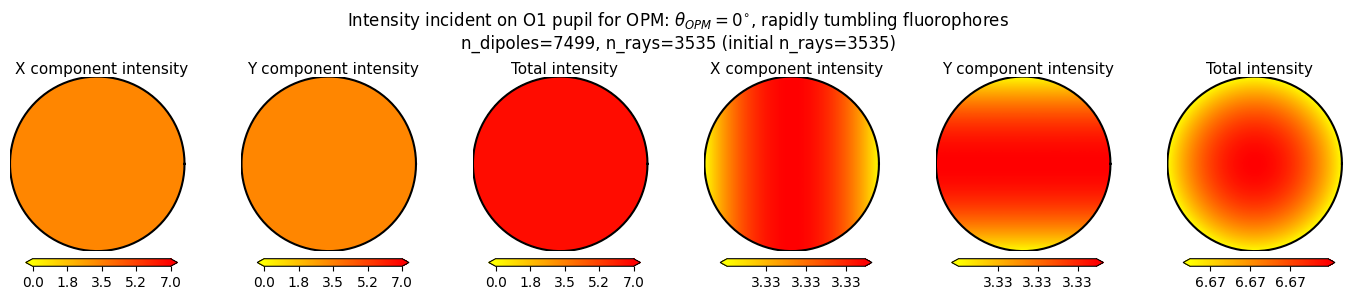

Full sphere generation
cap method area sum 12.564694874875116
expected area sum 6.283185307179586
cap method area sum 2.0763968549264256
expected area sum 2.1272488661465454


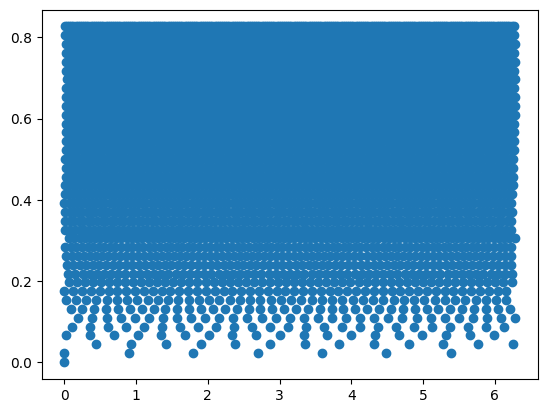

n_dipoles 7499
n_rays 4388
pvec shape (7499, 1, 3)
nvec shape (1, 4388, 3)
(7499, 4388, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
cap method area sum 6.213785710427704
expected area sum 6.283185307179586
n_dipoles 7499
n_rays 12640
pvec shape (7499, 1, 3)
nvec shape (1, 12640, 3)
(7499, 12640, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
n rays 2pi =  12640
(4388, 3, 1)
n rays =  4388
NA area vs real area? 2.0763968549264256 2.1272488661465454
half_sphere_energy 4.142525745794023
initial_energy 1.3843143114439762
rays when NA scaled up to hemisphere 13278.105802602438
initialisation time in system 22.865520s
Flat pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x0000023A7743CF70>
CURVED REFRACTION
max rho curved 0.002206434538450178
Saved checkpoint with 1000 rays


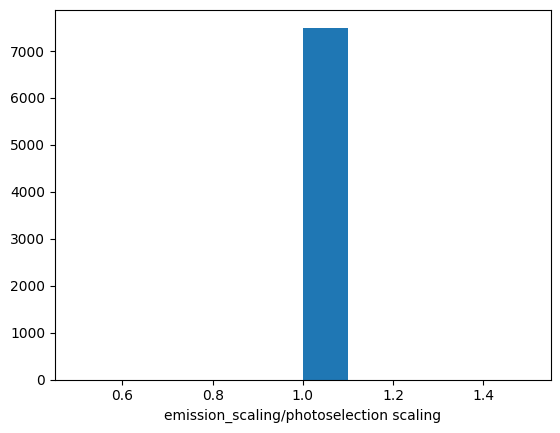

Limiting radius for detector: 0.0022500000000000003
Energy ratio (efficiency): 1.0
Total energy per dipole per ray: 1.3843143114439762
Energy from Ix 1462.7192254226863
Energy from Iy 1462.7192254226868
X/Y energy ratio = 0.9999999999999997
Half sphere energy 4.142525745794023
Initial energy 1.3843143114439762
half sphere energy NA 1.384265217833912
maxr 0.0022500000000000003
0 escaped out of 4388
Saved checkpoint with 1000 rays
0 escaped out of 4388
time in trace_rays 30.041007s
ray count 4388
max Ix 4.920013594460245
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
pupil_boundary_radius 0 max_r 0.0022064310278699095
max_r_reduced 0.002206400136203087 max_r 0.0022064310278699095


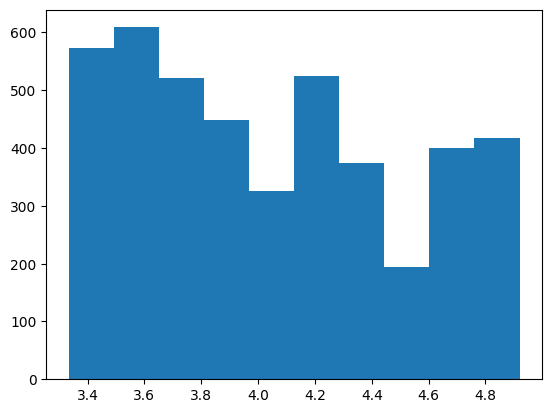

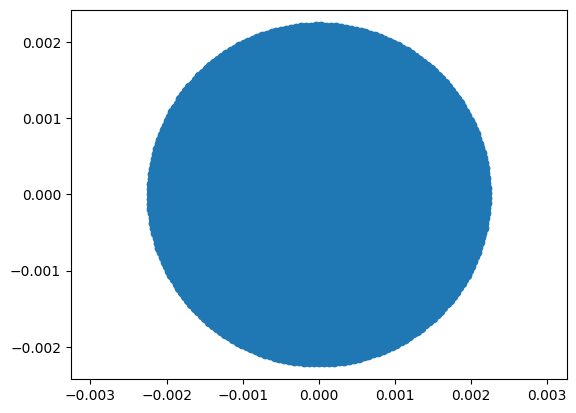

pupil_boundary_radius None max_r 0.0022064310278699095
cb3.vmax bf 9.825


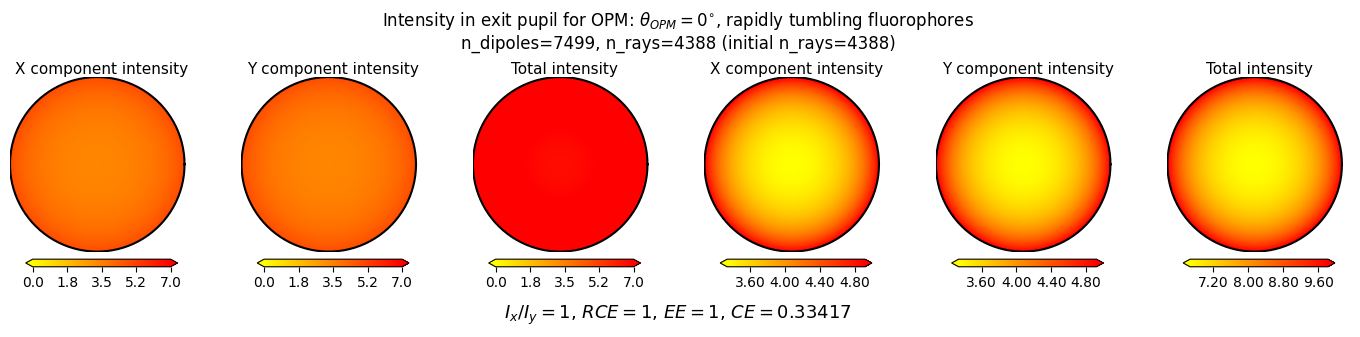

ray count 4388
max Ix 3.333547387795266
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
pupil_boundary_radius 0 max_r 0.7354770092899697
max_r_reduced 0.7354667120676955 max_r 0.7354770092899697


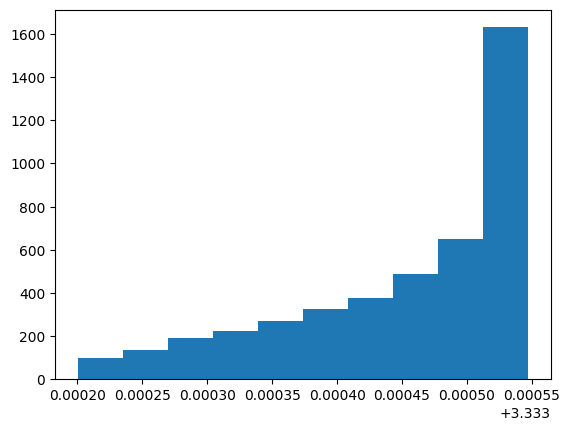

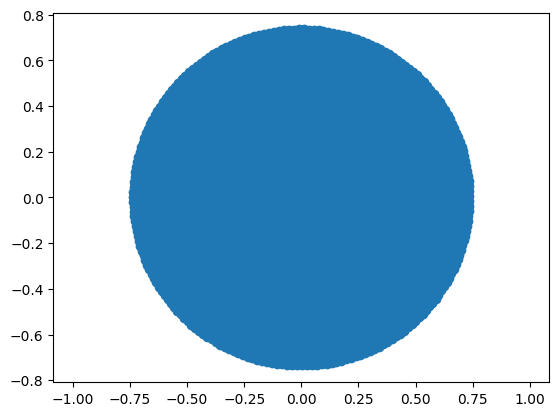

pupil_boundary_radius None max_r 0.7354770092899697
cb3.vmax bf 6.6670945


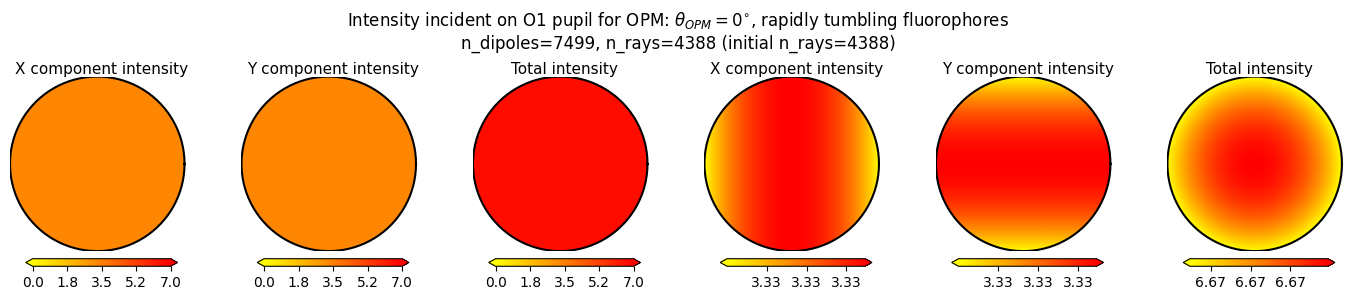

Full sphere generation
cap method area sum 12.564694874875116
expected area sum 6.283185307179586
cap method area sum 2.079919908946708
expected area sum 2.1272488661465454


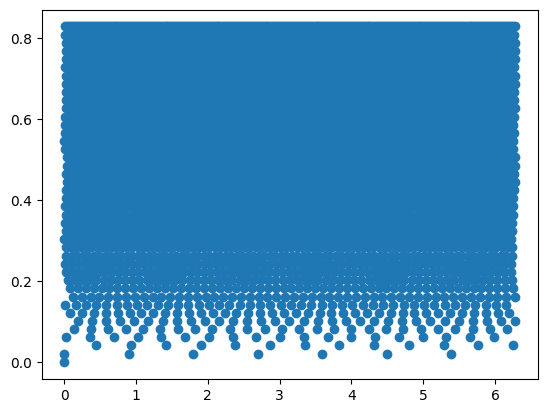

n_dipoles 7499
n_rays 5131
pvec shape (7499, 1, 3)
nvec shape (1, 5131, 3)
(7499, 5131, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
cap method area sum 6.220092894954304
expected area sum 6.283185307179586
n_dipoles 7499
n_rays 15308
pvec shape (7499, 1, 3)
nvec shape (1, 15308, 3)
(7499, 15308, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
n rays 2pi =  15308
(5131, 3, 1)
n rays =  5131
NA area vs real area? 2.079919908946708 2.1272488661465454
half_sphere_energy 4.14673057065527
initial_energy 1.3866630156587147
rays when NA scaled up to hemisphere 15500.127515710265
initialisation time in system 29.558485s
Flat pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x0000023A7743CF70>
CURVED REFRACTION
max rho curved 0.0022094925553073274
Saved checkpoint with 1000 rays


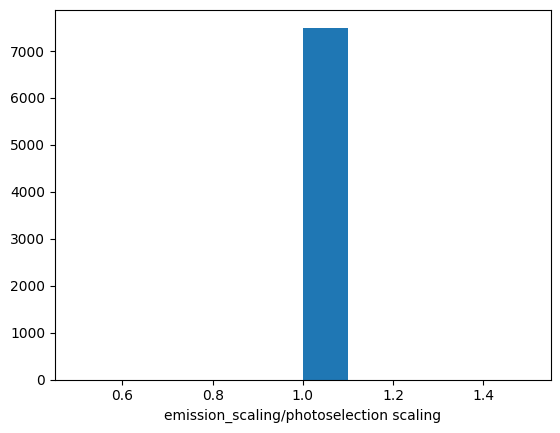

Limiting radius for detector: 0.0022500000000000003
Energy ratio (efficiency): 1.0
Total energy per dipole per ray: 1.3866630156587147
Energy from Ix 1710.3946894156986
Energy from Iy 1710.3946894156988
X/Y energy ratio = 0.9999999999999999
Half sphere energy 4.14673057065527
Initial energy 1.3866630156587147
half sphere energy NA 1.3866139327179943
maxr 0.0022500000000000003
0 escaped out of 5131
Saved checkpoint with 1000 rays
0 escaped out of 5131
time in trace_rays 37.025009s
ray count 5131
max Ix 4.928073703647892
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
pupil_boundary_radius 0 max_r 0.0022094821101485934
max_r_reduced 0.0022094589559453915 max_r 0.0022094821101485934


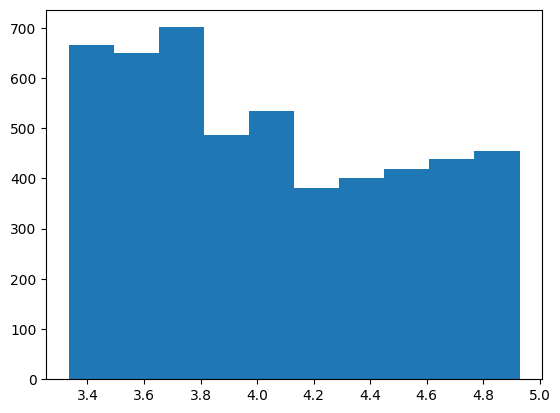

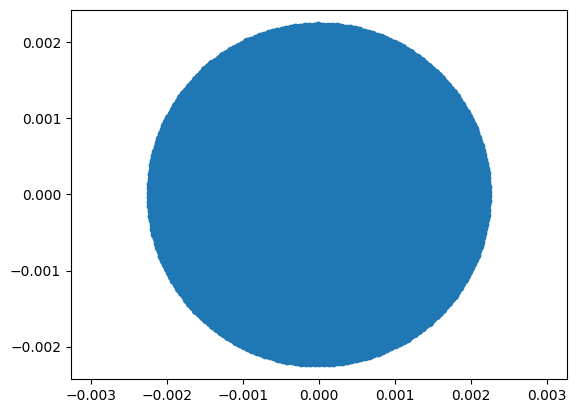

pupil_boundary_radius None max_r 0.0022094821101485934
cb3.vmax bf 9.855


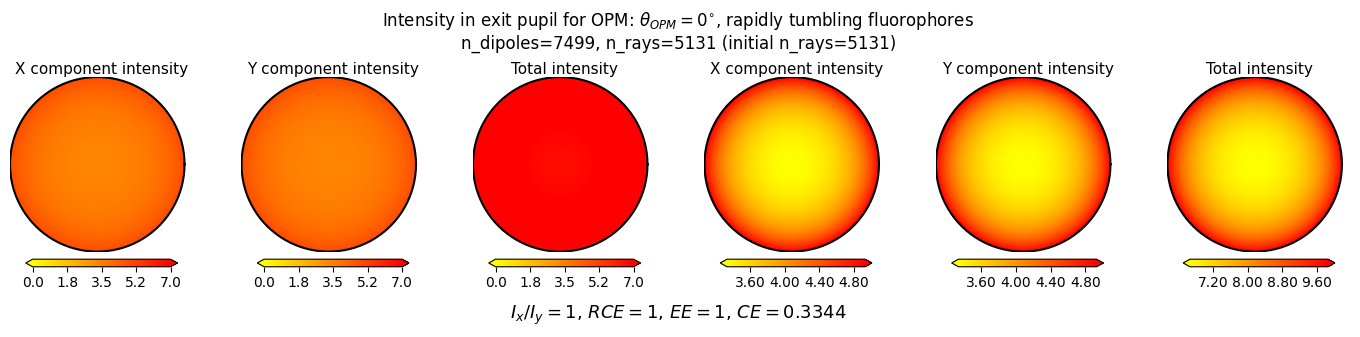

ray count 5131
max Ix 3.333547387795266
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
pupil_boundary_radius 0 max_r 0.7364940367161978
max_r_reduced 0.7364863186484639 max_r 0.7364940367161978


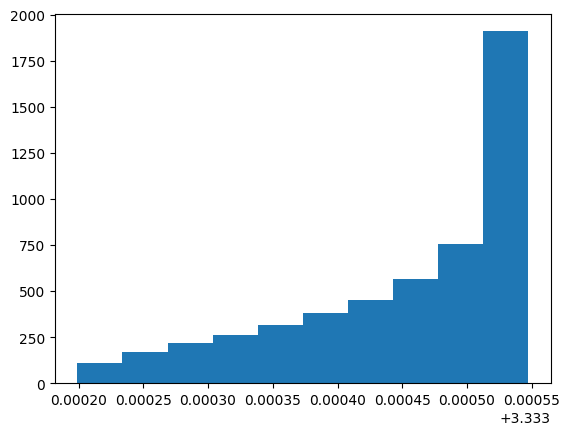

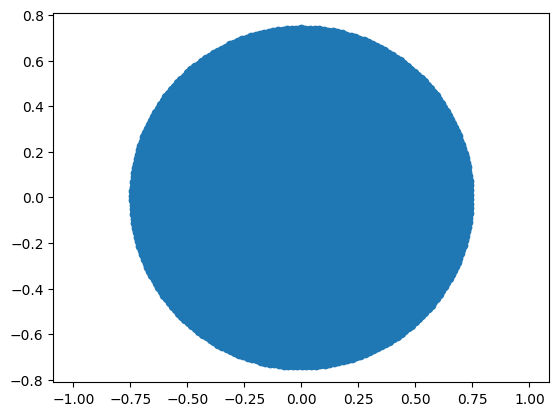

pupil_boundary_radius None max_r 0.7364940367161978
cb3.vmax bf 6.6670945


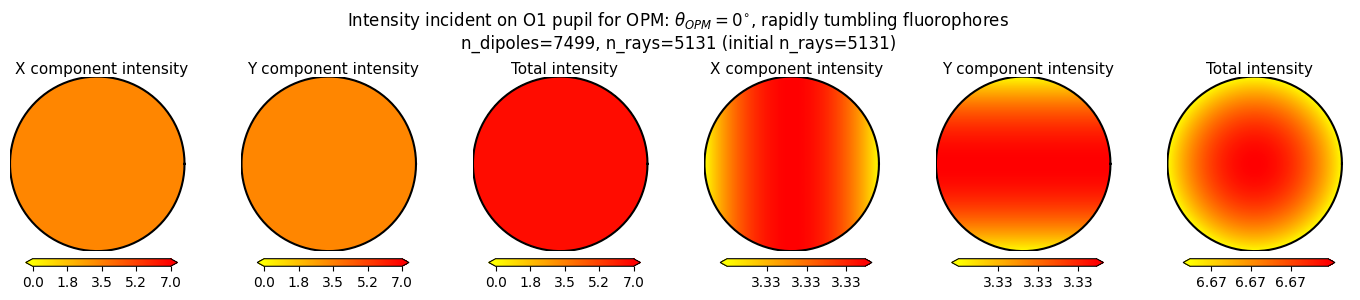

Full sphere generation
cap method area sum 12.564694874875116
expected area sum 6.283185307179586
cap method area sum 2.0839081089935325
expected area sum 2.1272488661465454


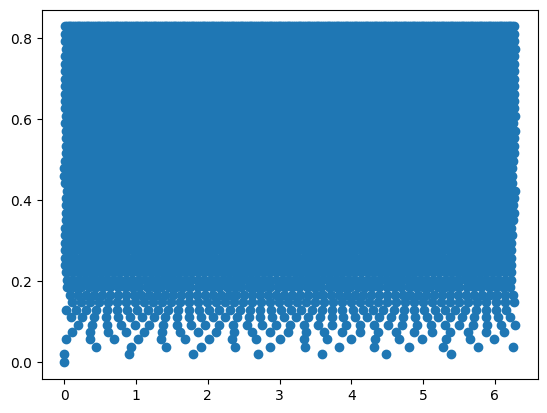

n_dipoles 7499
n_rays 6104
pvec shape (7499, 1, 3)
nvec shape (1, 6104, 3)
(7499, 6104, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
cap method area sum 6.224459825826227
expected area sum 6.283185307179586
n_dipoles 7499
n_rays 17665
pvec shape (7499, 1, 3)
nvec shape (1, 17665, 3)
(7499, 17665, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
n rays 2pi =  17665
(6104, 3, 1)
n rays =  6104
NA area vs real area? 2.0839081089935325 2.1272488661465454
half_sphere_energy 4.149641523396743
initial_energy 1.3893218584840943
rays when NA scaled up to hemisphere 18404.152730874193
initialisation time in system 33.410693s
Flat pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x0000023A7743CF70>
CURVED REFRACTION
max rho curved 0.0022130361254623482
Saved checkpoint with 1000 rays


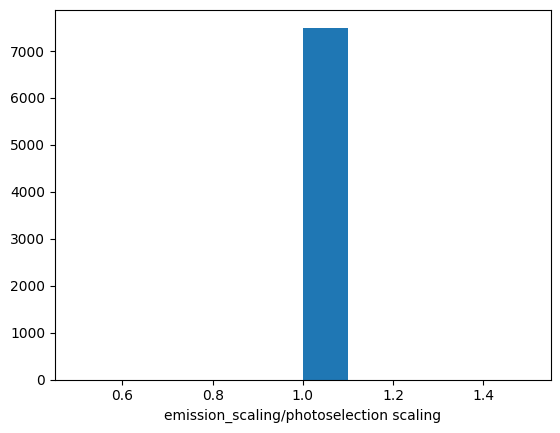

Limiting radius for detector: 0.0022500000000000003
Energy ratio (efficiency): 1.0
Total energy per dipole per ray: 1.3893218584840943
Energy from Ix 2034.7395807876362
Energy from Iy 2034.7395807876362
X/Y energy ratio = 1.0
Half sphere energy 4.149641523396743
Initial energy 1.3893218584840943
half sphere energy NA 1.3892726215603604
maxr 0.0022500000000000003
0 escaped out of 6104
Saved checkpoint with 1000 rays
0 escaped out of 6104
time in trace_rays 43.919628s
ray count 6104
max Ix 4.93747741404367
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
pupil_boundary_radius 0 max_r 0.0022130278167413
max_r_reduced 0.002213007309179888 max_r 0.0022130278167413


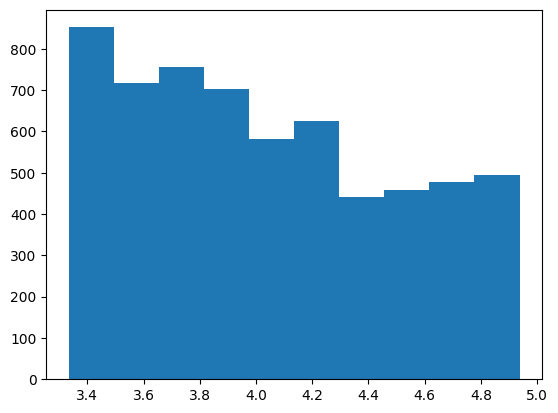

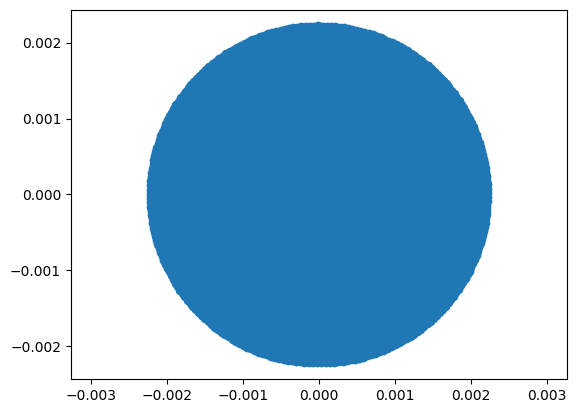

pupil_boundary_radius None max_r 0.0022130278167413
cb3.vmax bf 9.870000000000001


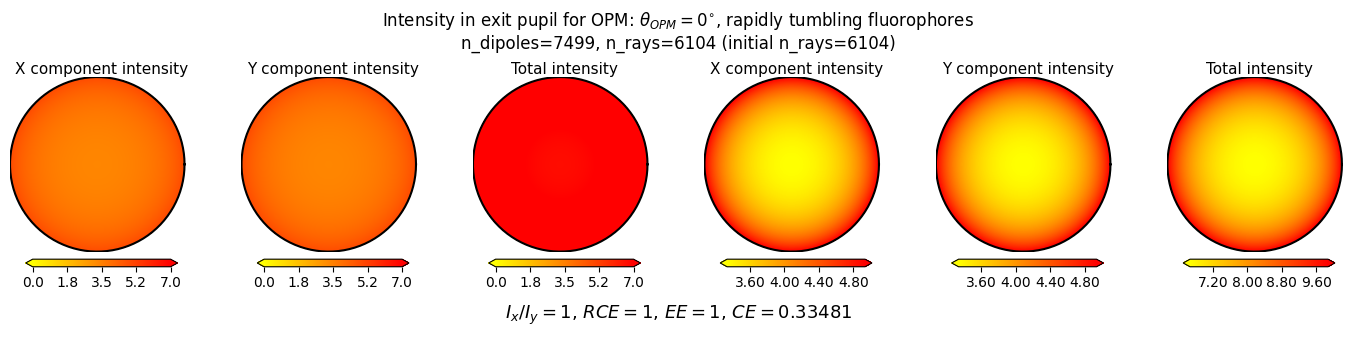

ray count 6104
max Ix 3.333547387795266
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
pupil_boundary_radius 0 max_r 0.7376759389137667
max_r_reduced 0.7376691030599628 max_r 0.7376759389137667


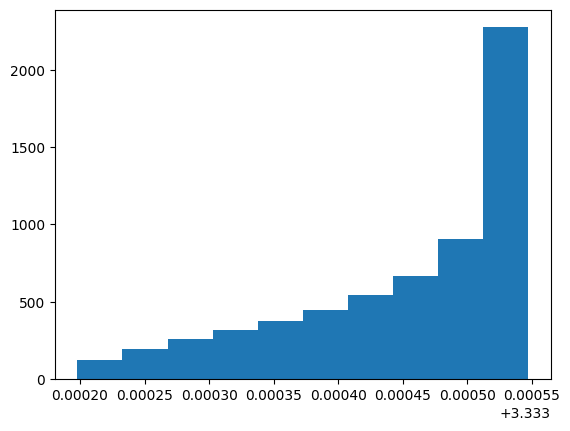

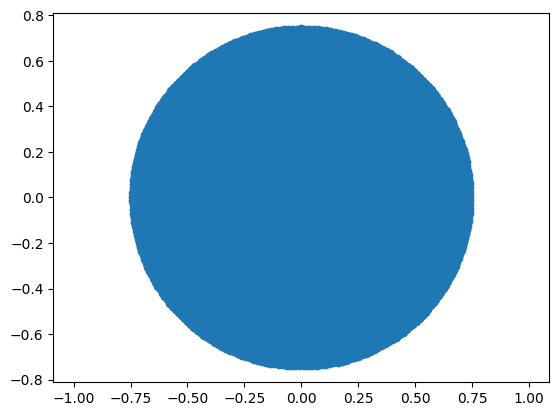

pupil_boundary_radius None max_r 0.7376759389137667
cb3.vmax bf 6.6670945


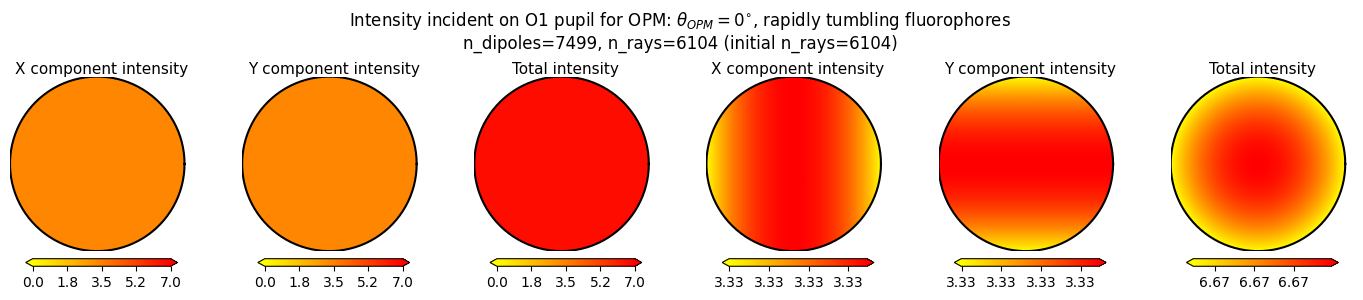

'\n        # p-polarised \n        source = dipole_source.DipoleSource()\n        source.generate_dipoles(dipole_count)\n        source.classical_photoselection(p_pol)\n\n        system = OpticalSystem("OPM system (%d degrees) p-polarised" % opm_angle, elements_fun(opm_angle), source, options)\n        system.trace()\n        plot_options[\'title\'] =             r\'Intensity in exit pupil for OPM: $\theta_{OPM}=%d^{\\circ}$, p-polarised excitation, static fluorophores\'            % (opm_angle)\n        pupil_fig = system.detector.plot_pupil(**plot_options_p)\n        pupil_fig.savefig(os.path.join(savepath_full, "pupil_plot_p-polarised_%d.png" % (opm_angle)), bbox_inches=\'tight\' )\n\n        f.write("%0.1f,%s, %.2f,%.2f,%.2f,%0.5f,%0.5f,%0.5f\n" % \n            (opm_angle, "p-polarised", elements_fun(opm_angle)[0].NA, elements_fun(opm_angle)[3].NA, elements_fun(opm_angle)[4].NA,\n             system.detector.relative_collection_efficiency,\n             system.detector.emission_eff

In [10]:
raycount_array = []
CE_array = []

with open(save_details, 'a') as f:
    f.write("focal lengths:\n")
    f.write("O1,TL1,TL2,O2,O3\n")
    fs=[el.focal_length for el in elements_fun(0)]
    f.write(",".join(str(item) for item in fs))
    f.write("\noptions:\n")
    f.write(json.dumps(options))
    f.write("\nmin_OPM_angle: %f\n" % min_OPM_angle )
    f.write("\nOPM_angle_noclip: %f\n" % OPM_angle_noclip )
    
with open(save_filename, 'a') as f:
    f.write("angle,polarisation,NA1,NA2,NA3,RCE,EE,CE\n")
    for opm_angle in opm_angles:
        for rayc in [5000, 7500, 10000, 12500, 15000, 17500]:
            options['ray_count'] = rayc
            # un/depolarised
            source = dipole_source.DipoleSource()
            # source.add_dipoles((0,0))
            source.generate_dipoles(dipole_count)

            system = OpticalSystem("OPM (%d degrees) rapid tumbling" % opm_angle, element_onelens, source, options)
            system.trace()
            plot_options['title'] = \
                r'Intensity in exit pupil for OPM: $\theta_{OPM}=%d^{\circ}$, rapidly tumbling fluorophores' \
                % (opm_angle)
            pupil_fig = system.detector.plot_pupil(**plot_options_un)
            pupil_fig.savefig(os.path.join(savepath_full, "pupil_plot_tumbling_%d.png" % (opm_angle)), bbox_inches='tight' )

            f.write("%0.1f,%s, %.3f,%.3f,%.3f,%0.5f,%0.5f,%0.5f\n" % 
                (opm_angle, "unpolarised", elements_fun(opm_angle)[0].NA, elements_fun(opm_angle)[3].NA, elements_fun(opm_angle)[4].NA,
                 system.detector.relative_collection_efficiency,
                 system.detector.emission_efficiency, 
                 system.detector.collection_efficiency)
                )
            
            raycount_array.append(rayc)
            CE_array.append(system.detector.collection_efficiency)

            plot_options['title'] = \
                r'Intensity incident on O1 pupil for OPM: $\theta_{OPM}=%d^{\circ}$, rapidly tumbling fluorophores'\
                % (opm_angle)
            pupil_fig_i = system.initial_detector.plot_pupil(**plot_options_un)
            pupil_fig_i.savefig(os.path.join(savepath_full, "initial_pupil_plot_tumbling_%d.png" % (opm_angle)), bbox_inches='tight' )
"""
        # p-polarised 
        source = dipole_source.DipoleSource()
        source.generate_dipoles(dipole_count)
        source.classical_photoselection(p_pol)

        system = OpticalSystem("OPM system (%d degrees) p-polarised" % opm_angle, elements_fun(opm_angle), source, options)
        system.trace()
        plot_options['title'] = \
            r'Intensity in exit pupil for OPM: $\theta_{OPM}=%d^{\circ}$, p-polarised excitation, static fluorophores'\
            % (opm_angle)
        pupil_fig = system.detector.plot_pupil(**plot_options_p)
        pupil_fig.savefig(os.path.join(savepath_full, "pupil_plot_p-polarised_%d.png" % (opm_angle)), bbox_inches='tight' )

        f.write("%0.1f,%s, %.2f,%.2f,%.2f,%0.5f,%0.5f,%0.5f\n" % 
            (opm_angle, "p-polarised", elements_fun(opm_angle)[0].NA, elements_fun(opm_angle)[3].NA, elements_fun(opm_angle)[4].NA,
             system.detector.relative_collection_efficiency,
             system.detector.emission_efficiency, 
             system.detector.collection_efficiency)
            )

        plot_options['title'] = \
            r'Intensity incident on O1 pupil for OPM: $\theta_{OPM}=%d^{\circ}$, p-polarised excitation, static fluorophores'\
            % (opm_angle)
        pupil_fig_i = system.initial_detector.plot_pupil(**plot_options_p)
        pupil_fig_i.savefig(os.path.join(savepath_full, "initial_pupil_plot_p-polarised_%d.png" % (opm_angle)), bbox_inches='tight')

        # s-polarised
        source = dipole_source.DipoleSource()
        source.generate_dipoles(dipole_count)
        source.classical_photoselection(s_pol(opm_angle))

        system = OpticalSystem("OPM system (%d degrees) s-polarised" % opm_angle, elements_fun(opm_angle), source, options)
        system.trace()
        plot_options['title'] = \
            r'Intensity in exit pupil for OPM: $\theta_{OPM}=%d^{\circ}$, s-polarised excitation, static fluorophores'\
            % (opm_angle)
        pupil_fig = system.detector.plot_pupil(**plot_options_s)
        pupil_fig.savefig(os.path.join(savepath_full, "pupil_plot_s-polarised_%d.png" % (opm_angle)), bbox_inches='tight' )

        f.write("%0.1f,%s, %.2f,%.2f,%.2f,%0.5f,%0.5f,%0.5f\n" % 
            (opm_angle, "s-polarised", elements_fun(opm_angle)[0].NA, elements_fun(opm_angle)[3].NA, elements_fun(opm_angle)[4].NA,
             system.detector.relative_collection_efficiency,
             system.detector.emission_efficiency, 
             system.detector.collection_efficiency)
            )

        plot_options['title'] = \
            r'Intensity incident on O1 pupil for OPM: $\theta_{OPM}=%d^{\circ}$, s-polarised excitation, static fluorophores'\
            % (opm_angle)
        pupil_fig_i = system.initial_detector.plot_pupil(**plot_options_s)
        pupil_fig_i.savefig(os.path.join(savepath_full, "initial_pupil_plot_s-polarised_%d.png" % (opm_angle)), bbox_inches='tight' )
"""


In [34]:
print(system.detector.rays.ray_density)
print(system.detector.rays.n)
print(np.sum(system.detector.rays.areas))

intensity_per_dipole_vector = np.mean(system.detector.rays.intensity_vector, axis=0)
I_per_dipole = np.sum(intensity_per_dipole_vector, axis=1)
I_sum = np.sum(I_per_dipole)
print(I_sum)

2384.300248417945
5072
2.1272488661465454
3381.452750132407


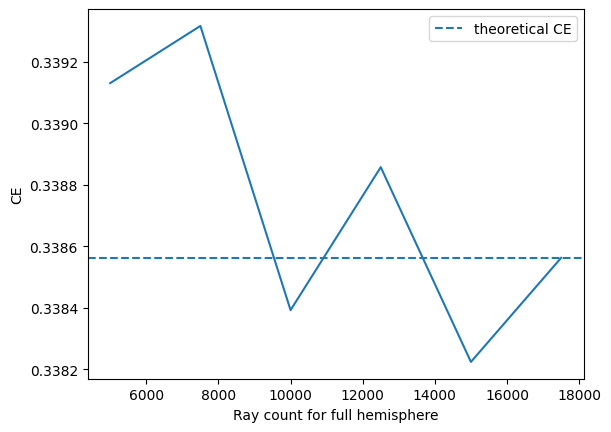

In [5]:
from matplotlib import pyplot
plt.figure()
plt.plot(raycount_array, CE_array)
plt.axhline(0.33856,label='theoretical CE', linestyle='--')
plt.xlabel("Ray count for full hemisphere")
plt.ylabel("CE")
plt.legend()

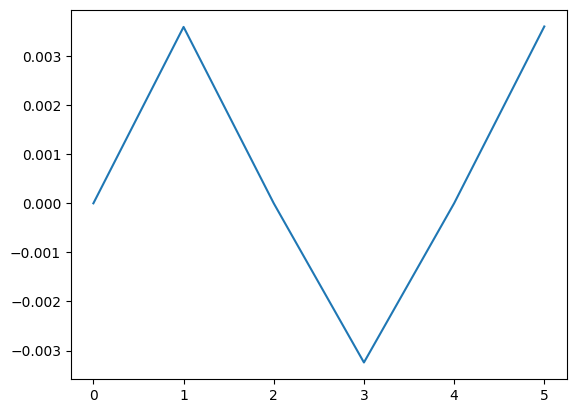

In [5]:
from matplotlib import pyplot
ray_hist = system.detector.rays.ray_history
#plt.figure()
rho_list=[]
for rays in ray_hist:
    rho_list.append(rays.rho[-1])
plt.plot(range(len(ray_hist)),rho_list)# rays.rho[0])
plt.show()
    

In [25]:
from matplotlib import pyplot
ray_hist = system.detector.rays.ray_history
#plt.figure()
xy_list=[]
x_list = []
y_list = []
z_list=[]
for n, rays in enumerate(ray_hist):
    x_list.append(ray_hist[n].pos[-1][0])
    y_list.append(ray_hist[n].pos[-1][1])
    z_list.append(ray_hist[n].pos[-1][2])
    xy_list.append(ray_hist[n].pos[-1][0]**2 + ray_hist[1].pos[-1][0]**2)
    
print(x_list)
print(y_list)
print(z_list)

np.max(y_list)
xy_max = np.max([np.max(y_list), np.max(x_list)])
xy_min= np.min([np.min(y_list), np.min(x_list)])

[array([0.]), array([0.00270463]), array([-0.00089253]), array([-0.00413809]), array([-0.00089253]), array([0.00271365])]
[array([0.]), array([5.07133851e-21]), array([3.09351649e-19]), array([5.83890275e-19]), array([5.89975881e-19]), array([5.96737666e-19])]
[array([0.]), array([0.00129806]), array([0.18126212]), array([0.3436357]), array([0.34519337]), array([0.34692412])]


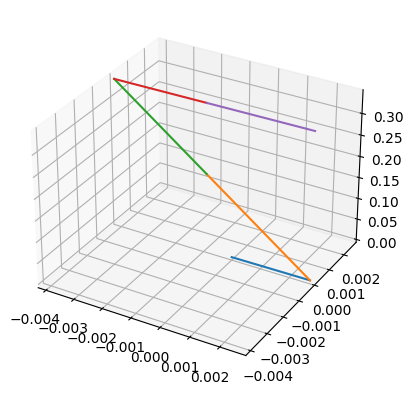

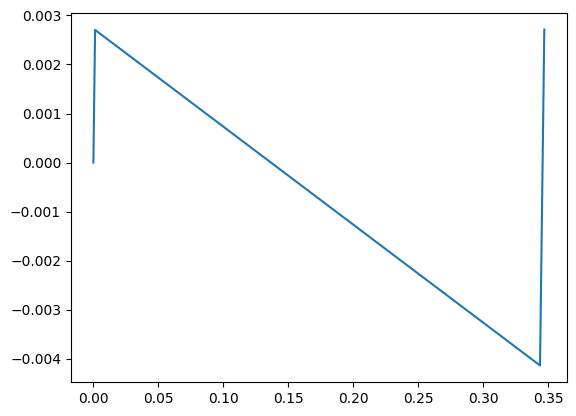

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(ray_hist)-1):
    ax.plot([x_list[i], x_list[i+1]], [y_list[i], y_list[i+1]],zs=[z_list[i],z_list[i+1]])
    
plt.xlim([xy_min, xy_max])
plt.ylim([xy_min, xy_max])
plt.show()

fig2 = plt.figure()
plt.plot(z_list, x_list)
plt.show()


In [32]:
import json
fs=[el.focal_length for el in elements_fun(0)]
(",".join(str(item) for item in fs))


'0.003,0.18,0.162,0.0036,0.004'

In [5]:
opm_angles

[0, 35, 45, 25.54383661122486, 15.865785498045994]

In [10]:
(ray_hist[1].pos[-1][0]**2 + ray_hist[1].pos[-1][0]**2)

array([[2.70463216e-03],
       [5.07133851e-21]])